**Curso Ciencia de Datos**

**Ing. Marcelo Saavedra**

Ejemplo 1

Resolver el Problema de Los Lirios de Fisher mediante SVM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# cargar el conjunto de datos de los lirios
iris = load_iris()

# Tomar solo las primeras dos características para la visualización
X = iris.data[:, 2:4]
y = iris.target

In [ ]:
# dividir el conjunto de datos en conjuntos de entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10)
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train = np.concatenate((X[0:25], X[50:75], X[100:125]))
y_train=np.concatenate((y[0:25], y[50:75], y[100:125]))

X_test=np.concatenate((X[25:50], X[75:100], X[125:150]))
y_test=np.concatenate((y[25:50], y[75:100], y[125:150]))



In [ ]:
# crear un clasificador SVM
svm_classifier = SVC(kernel='poly',degree=3 , C=10, random_state=0)
#SVC(kernel='poly', C=1, coef0=1.0, degree=2, gamma='scale', probability=True, random_state=0 )
# En el kernel 'linear', 'poly', 'rbf', 'sigmoid'
#

# entrenar el clasificador SVM en el conjunto de entrenamiento
svm_classifier.fit(X_train, y_train)

# predecir las etiquetas de los datos de prueba utilizando el clasificador SVM entrenado
y_pred = svm_classifier.predict(X_test)

# calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: ", accuracy)

# Crear una cuadrícula para la visualización del espacio de decisión
h = 0.02  # Paso del mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

print(y_test)
print(y_pred)



Precisión del modelo:  0.96
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


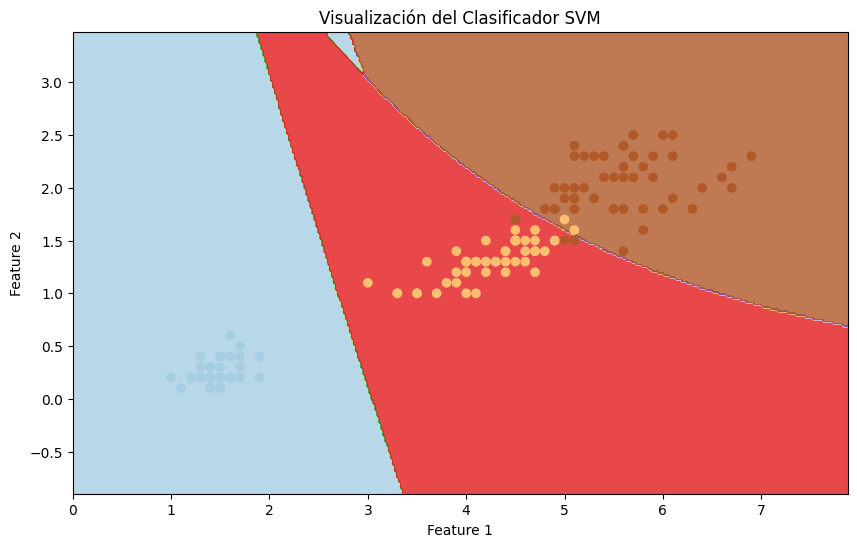

Matriz de confusión:
[[25  0  0]
 [ 0 23  2]
 [ 0  1 24]]


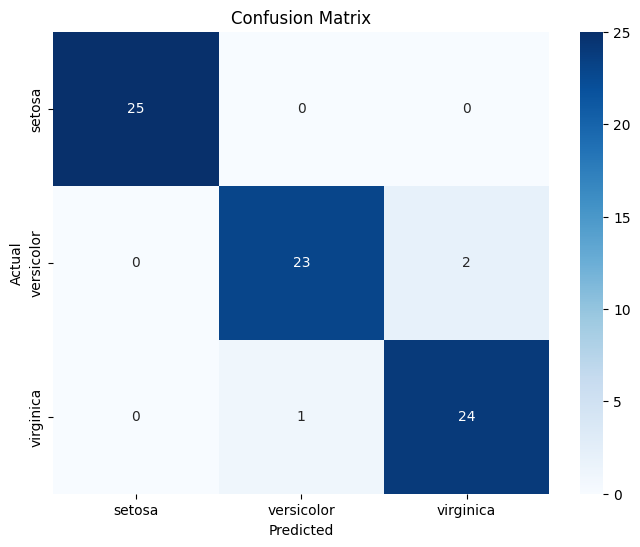

In [ ]:

# Realizar predicciones en la cuadrícula
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar el espacio de decisión y los puntos de datos
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualización del Clasificador SVM')
plt.show()

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Construir la matriz de confusión
confusion = confusion_matrix(y_test,y_pred)
# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(confusion)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Calculando curva ROC entre Versicolor y Virginica
vp=0
fp=0
vn=0
fn=0
vpr1 = 0
fpr1 = 0

tpr = [0] * 50
fpr = [0]* 50


for i in range(25, 75):
    tpr[i-25]=vpr1
    fpr[i-25]=fpr1
    if y_pred[i] == 1 and y_test[i] == 1:
        vp += 1
    if y_pred[i] == 2 and y_test[i] == 2:
        vn += 1
    if y_pred[i] == 2 and y_test[i] == 1:
        fp += 1
    if y_pred[i] == 1 and y_test[i] == 2:
        fn += 1
    #print(f"VP: {vp}, FP: {fp}, FN: {fn}, VN: {vn}")

    if (vp + fn)!=0:
      vpr1 = vp/(vp + fn)


    if (fp + vn)!=0:
      fpr1 = fp/(fp + vn)


fpr=np.round(fpr, 2)


tpr = np.sort(tpr)
fpr = np.sort(fpr)

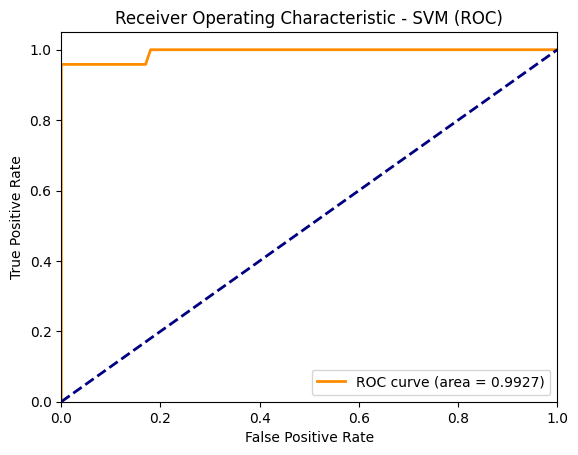

In [ ]:
# Graficar la curva ROC
from sklearn.metrics import roc_curve, auc
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVM (ROC)')
plt.legend(loc="lower right")
plt.show()

# **MODIFICAR LOS HIPERPARAMETROS**

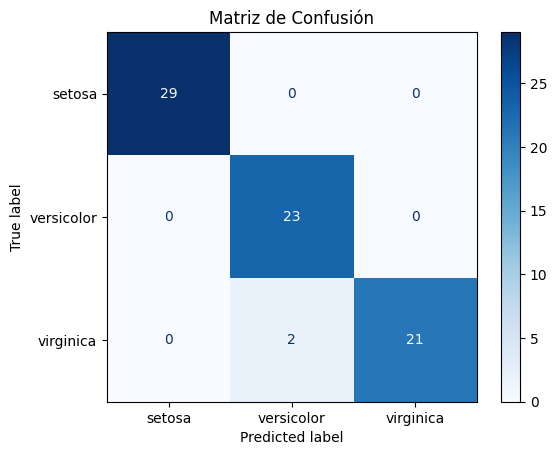

Mejores parámetros: {'svm__C': 1, 'svm__coef0': 1.0, 'svm__degree': 2, 'svm__gamma': 'scale'}

Reporte de Clasificación:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        29
  versicolor       0.92      1.00      0.96        23
   virginica       1.00      0.91      0.95        23

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75



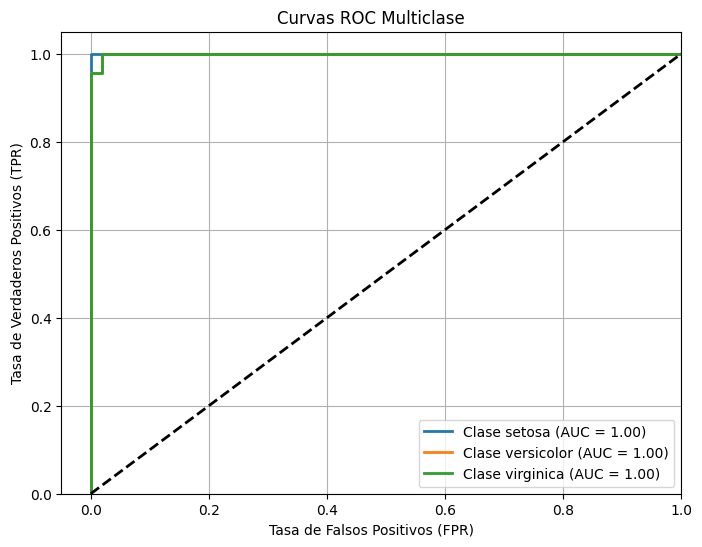

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
import numpy as np

# Cargar dataset
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Binarizar etiquetas para ROC multiclase
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Separar datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Pipeline: escalado + SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='poly', probability=True))  # Necesario para ROC
])

# Grid de parámetros
param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__degree': [2, 3, 4],
    'svm__gamma': ['scale', 'auto'],
    'svm__coef0': [0.0, 1.0],
}

# GridSearchCV
grid = GridSearchCV(pipeline, param_grid, cv=5)
grid.fit(X_train, y_train)

# Predicciones
y_pred = grid.predict(X_test)

# === Matriz de Confusión ===
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()

# === Reporte de Clasificación ===
print("Mejores parámetros:", grid.best_params_)
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=class_names))

# === Curvas ROC ===
y_score = grid.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Dibujar ROC por clase
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2,
             label=f'Clase {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC Multiclase')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
